In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# data setting

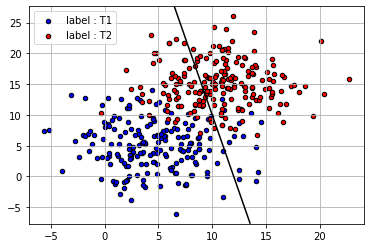

In [111]:
np.random.seed(0)
n = 200


T1 = np.ones(n)
T2 = (-1) * T1
T1_test = T1
T2_test = T2


X1 = np.random.normal(loc=(5, 5), scale=4, size=(n, 2))
X1_test = np.random.normal(loc=(5, 5), scale=4, size=(n, 2))


X2 = np.random.normal(loc=(10, 15), scale=4, size=(n, 2)) 
X2_test = np.random.normal(loc=(10, 15), scale=4, size=(n, 2))


X_train = np.concatenate((X1, X2))
T_train = np.concatenate((T1, T2))
X_test = np.concatenate((X1_test, X2_test))
T_test = T_train


plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : T1', s=20)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : T2', s=20)
plt.grid(True)
plt.legend()

axes = plt.gca() 
x_min, x_max = axes.get_xlim() 
y_min, y_max = axes.get_ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
grids = np.c_[xx.ravel(), yy.ravel()]

ab = np.array([-0.5, -0.1])
c = np.array([6])


Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')

# print(T1.shape)
# print(X_train.shape)
# print(X_train[T_train==1].shape)
plt.show()

# fully randomized trial 

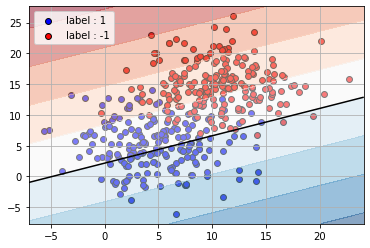

Training Accuracy :70.25%
Test Accuracy :71.00%


In [112]:
best_acc = 0
max_iter = 100
Pred_acc_best = 0
np.random.seed(0)

for i in range(max_iter):
  ab = np.random.normal(size=2) 
  c = np.random.normal(size=1)
  Pred_train = np.matmul(X_train, ab) + c
  Y_train = 2 * ((Pred_train) >= 0) - 1 
  Pred_acc = np.sum((Y_train == T_train)) / len(Y_train)
  if Pred_acc >= Pred_acc_best:
    Pred_acc_best = Pred_acc 
    best_ab = ab
    best_c = c


Pred_train = X_train@best_ab + best_c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@best_ab + best_c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)



plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

Z = grids@best_ab + best_c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.5)
plt.show()


print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

# Linear Classifier Perceptron with Gradient Descent

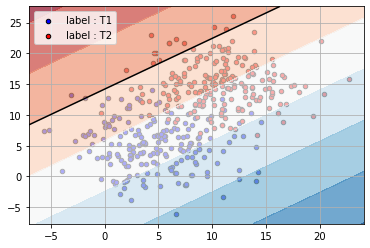

Training Accuracy :52.75%
Test Accuracy :55.00%


In [113]:
np.random.seed(0)
max_iter = 100
learning_rate = 0.01
ab = np.random.normal(size=2)   
c = np.random.normal(size=1)

for i in range(max_iter):
  Pred_train = np.matmul(X_train, ab) + c
  Y_train = 2 * ((Pred_train) >= 0) - 1

  loss = np.sum(Pred_train * (Y_train-T_train))
  grad_a = np.sum(X_train[:,0] * (Y_train - T_train))
  grad_b = np.sum(X_train[:,1] * (Y_train - T_train))
  grad_c = np.sum((Y_train - T_train))
  

  ab[0] -= learning_rate * grad_a
  ab[1] -= learning_rate * grad_b
  c -= learning_rate * grad_c


Pred_train = X_train@ab + c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@ab + c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)


plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : T1', s=20)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : T2', s=20)
plt.grid(True)
plt.legend()


Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)  
plt.show()


print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

# SGD

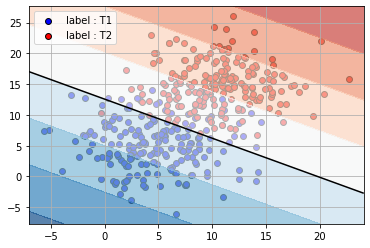

Training Accuracy :91.50%
Test Accuracy :90.75%


In [118]:
np.random.seed(0)
max_iter = 100
learning_rate = 0.01
ab = np.random.normal(size=2)  
c = np.random.normal(size=1)


for i in range(max_iter):
  indices = np.arange(len(X_train))
  np.random.shuffle(indices)
  X_train_shuffle = X_train[indices]
  T_train_shuffle = T_train[indices]
  for j in range(len(X_train)):
    x_train = X_train_shuffle[j,:]
    t_train = T_train_shuffle[j]
    pred_train = np.matmul(x_train, ab) + c
    y_train = 2 * (pred_train >= 0) - 1
    
    loss = pred_train * (y_train-t_train)
    grad_a = (x_train[0] * (y_train-t_train))
    grad_b = (x_train[1] * (y_train-t_train))
    grad_c = (y_train - t_train)
    
    ab[0] -= learning_rate * grad_a[0]
    ab[1] -= learning_rate * grad_b[0]
    c -= learning_rate * grad_c


Pred_train = X_train@ab + c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@ab + c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)

plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : T1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : T2', s=35)
plt.grid(True)
plt.legend()


Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)  
plt.show()


print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))

# mini-Batch SGD

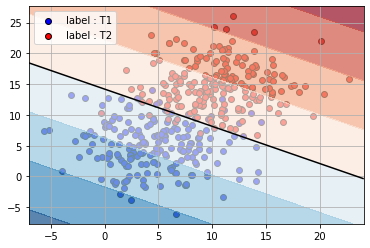

Training Accuracy :93.25%
Test Accuracy :92.25%


In [119]:
np.random.seed(0)
max_iter = 100
learning_rate = 0.01
ab = np.random.normal(size=2)   
c = np.random.normal(size=1)

batchsize = 10
n_batches = len(X_train)
 
for i in range(max_iter):
  indices = np.arange(n_batches)
  np.random.shuffle(indices)
  X_train_shuffle = X_train[indices]
  T_train_shuffle = T_train[indices]
    
  for j in range(n_batches):
    x_train = X_train_shuffle[batchsize*j:batchsize*(j+1),:]
    t_train = T_train_shuffle[batchsize*j:batchsize*(j+1)]

    pred_train = np.matmul(x_train, ab) + c
    y_train = 2 * (pred_train >= 0) - 1
    
    loss = pred_train * (y_train-t_train)
    grad_a = np.sum(x_train[:,0] * (y_train - t_train))
    grad_b = np.sum(x_train[:,1] * (y_train - t_train))
    grad_c = np.sum((y_train - t_train))
    
    ab[0] -= learning_rate * grad_a
    ab[1] -= learning_rate * grad_b
    c -= learning_rate * grad_c

Pred_train = X_train@ab + c
Y_train = 2 * ((Pred_train) >= 0) - 1
Pred_acc_train = np.sum((Y_train == T_train)) / len(Y_train)

Pred_test = X_test@ab + c
Y_test = 2 * ((Pred_test) >= 0) - 1
Pred_acc_test = np.sum((Y_test == T_test)) / len(Y_test)

plt.scatter(X_train[T_train==1][:, 0].T, X_train[T_train==1][:, 1].T, color='b', edgecolor='k', label='label : T1', s=35)
plt.scatter(X_train[T_train==-1][:, 0].T, X_train[T_train==-1][:, 1].T, color='r', edgecolor='k', label='label : T2', s=35)
plt.grid(True)
plt.legend()

Z = grids@ab + c
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap='RdBu', alpha=0.7)  
plt.show()
print('Training Accuracy :{:.2f}%'.format(100*Pred_acc_train))
print('Test Accuracy :{:.2f}%'.format(100*Pred_acc_test))